In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [7]:
# !pip install scikit-plot

In [2]:
from scikitplot.metrics import plot_roc

In [3]:
from seaborn import heatmap
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_curve, auc, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

def plot_roc_curve(fp_r, tp_r):
    roc_auc = auc(fp_r, tp_r)
    plt.plot(fp_r, tp_r, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_model(m, X, y, three=False):
  y_pred = []
  y_prob = []
  for i in range(len(y)):
    X_test = X[i, :].reshape(1, -1)
    X_train = np.delete(X, i, axis=0)
    y_test = y[i]
    y_train = np.delete(y, i)
    m.fit(X_train, y_train)
    y_pred.append(m.predict(X_test))
    y_prob.append(m.predict_proba(X_test))
  y_prob = np.squeeze(y_prob)
  y_pred = np.squeeze(y_pred)
  print('Accuracy score: ' + str(accuracy_score(y, y_pred)))
  heatmap(confusion_matrix(y, y_pred), annot=True, fmt= 'd', cmap=plt.cm.Blues)
  plt.show()
  heatmap(confusion_matrix(y, y_pred, normalize='true'), annot=True, cmap=plt.cm.Blues)
  plt.show()
  plot_roc(y, y_prob)
  plt.show()


In [4]:
import os
import pandas as pd

root = '../'

# get the true data 
df = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
# get the prediction data (for the scores)
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
df = df.loc[result.index.values]

df[df.columns[-1]].value_counts()

MCI        130
DEMENZA     62
NORMALI     30
MCI          1
Name: DGN1, dtype: int64

In [5]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Mark as 0 the data that is normal. The pathologies are marked as 1 
def label(s):
    if s == 'NORMALI':
        return 0
    else:
      return 1

# select the scores from the true data
X = df.iloc[:, 3:-1].to_numpy()
print(X.shape)
# scale the labels using a scaler; THIS I SHOULD SAVE IF I DECIDE TO GO WITH THIS
X_s = StandardScaler().fit_transform(X)
# get the true labels
y = df.iloc[:,-1].to_numpy().astype(str)

# for each label, set it on 0 if it's Normali, or 1 otherwise
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

(223, 18)
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0]


Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 9808 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 16393 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 20000 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:   53.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:   38.3s finished


LOOCV score = 0.8654708520179372
Accuracy score: 0.8654708520179372


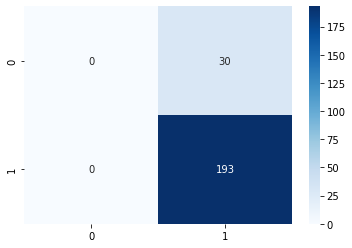

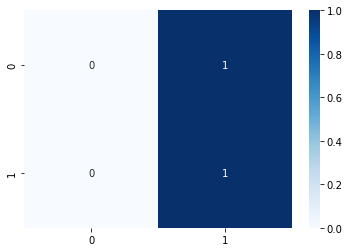

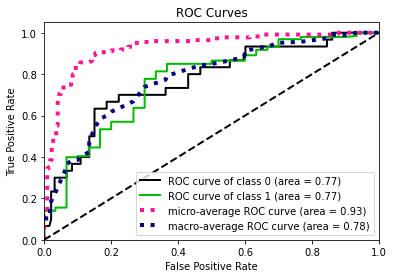

LOOCV score = 0.8654708520179372
Accuracy score: 0.8654708520179372


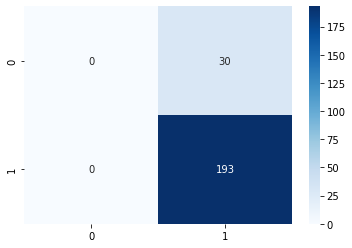

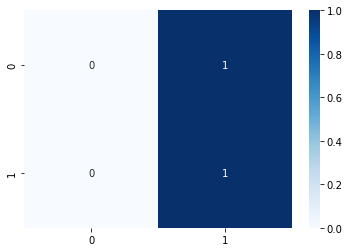

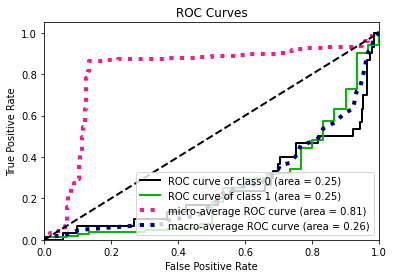

LOOCV score = 0.8699551569506726
Accuracy score: 0.8699551569506726


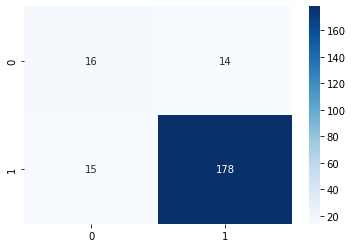

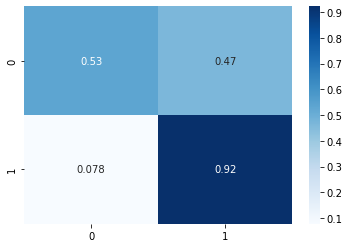

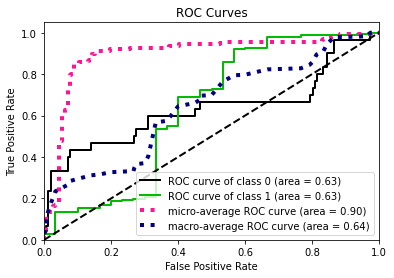

In [12]:
# Build up the grid searches and their parameters for SVMs with 3 different kernels 
# Fit the scores to the labels

# THIS IS WITH CLASS WEIGHT NONE! Which is not such a great idea because the dataset is terribly unbalanced
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.789 (0.408)
Accuracy score: 0.7892376681614349


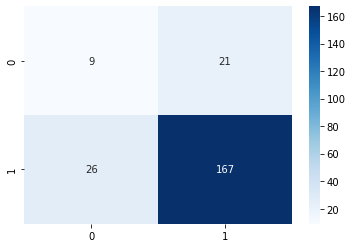

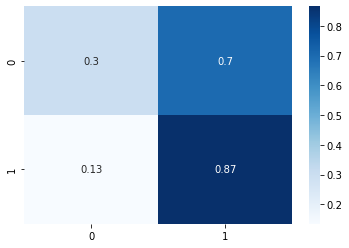

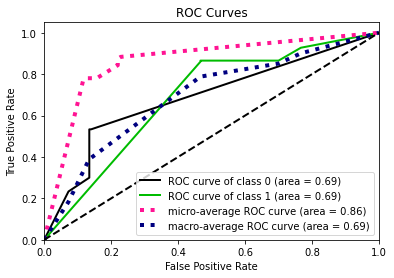

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 10940 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 15888 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 19528 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 22480 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 33400 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:  1.5min finished


LOOCV score = 0.7802690582959642
Accuracy score: 0.7802690582959642


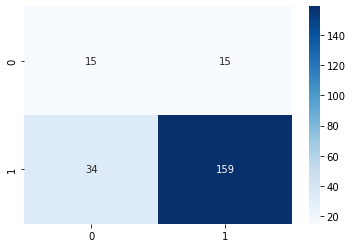

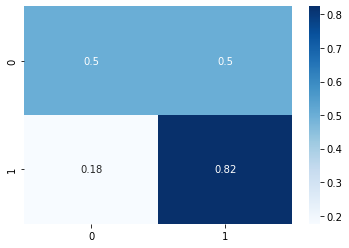

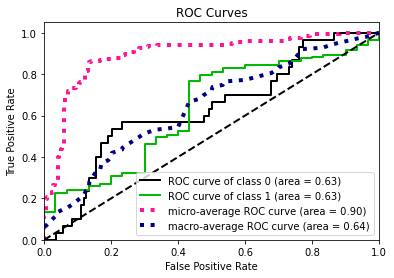

LOOCV score = 0.8609865470852018
Accuracy score: 0.8609865470852018


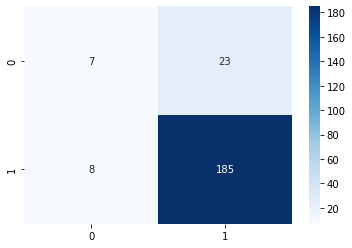

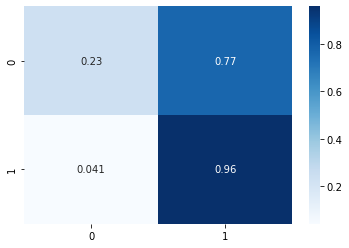

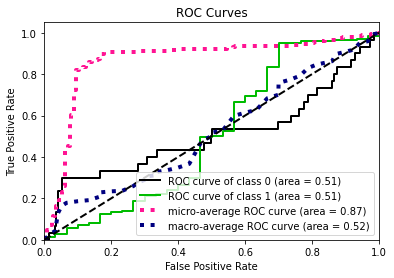

LOOCV score = 0.7668161434977578
Accuracy score: 0.7668161434977578


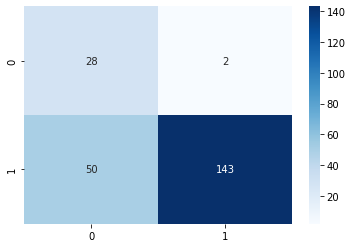

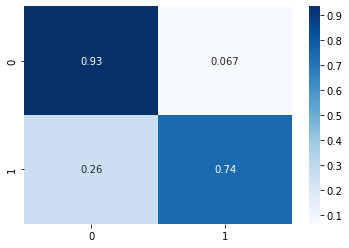

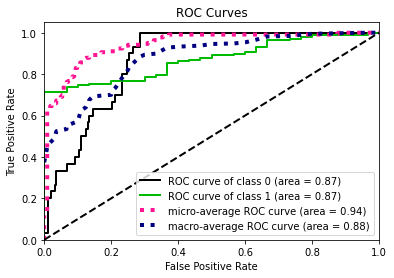

In [6]:
# ANOTHER GRID SEARCH ON THE ORIGINAL DATASET 
# THIS IS WITH CLASS WEIGHT balanced! Which is a great idea because the dataset is terribly unbalanced

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.807 (0.395)
Accuracy score: 0.8071748878923767


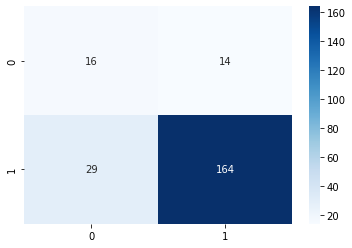

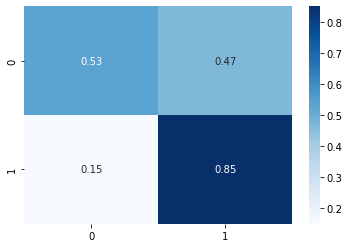

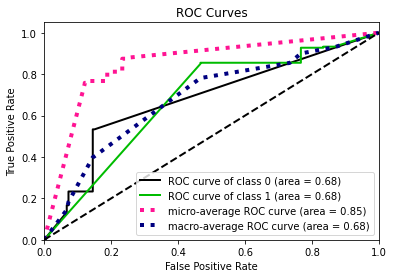

In [15]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [17]:
df = pd.read_csv(os.path.join(root, 'bilanciato_abbate_3.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Fitting 386 folds for each of 90 candidates, totalling 34740 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s


KeyboardInterrupt: 

# TRAIN ON RESUTS (PREDICTED SCORES) - BEST

Accuracy: 0.789 (0.408)
Accuracy score: 0.7892376681614349


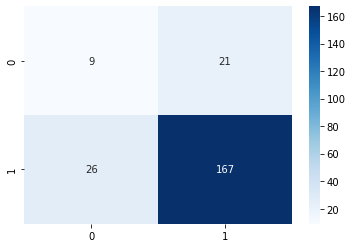

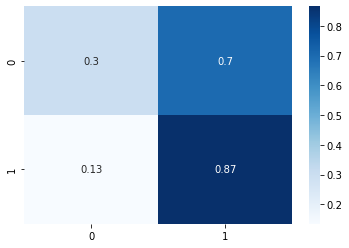

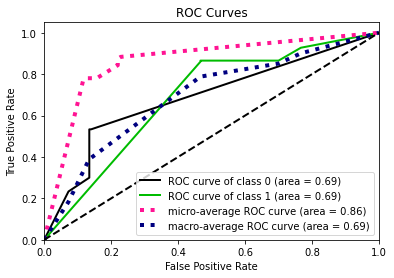

In [7]:
# cv = LeaveOneOut()
# decision_t = DecisionTreeClassifier(random_state=0)
# scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
# print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
# plot_model(decision_t, X, y_3)

In [7]:
# TRAIN DONE ON THE PREDICTED SCORES ( RESULTS )
# THIS IS MENTIONED IN THE THESIS AS BEING THE BEST
# DON'T FORGET TO SAVE THE SCALER AS WELL
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
X = result.to_numpy()

scaler = StandardScaler()
X_s = scaler.fit_transform(X)
print(scaler)
print(X.shape)
y = df.loc[result.index.values, 'DGN1'].to_numpy()
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

StandardScaler(copy=True, with_mean=True, with_std=True)
(223, 18)
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0]


Accuracy: 0.780 (0.414)
Accuracy score: 0.7802690582959642


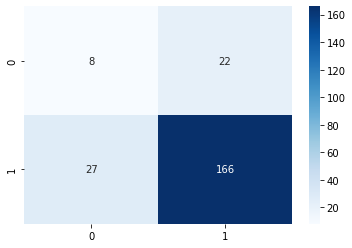

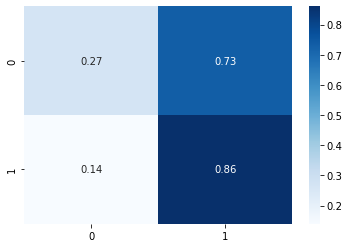

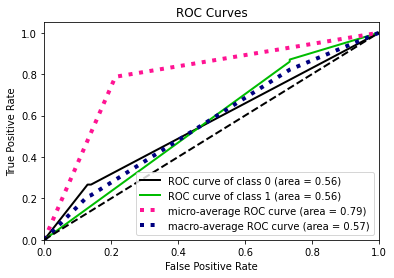

In [9]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 14496 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:   41.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:   39.0s finished


LOOCV score = 0.8699551569506726
Accuracy score: 0.8699551569506726


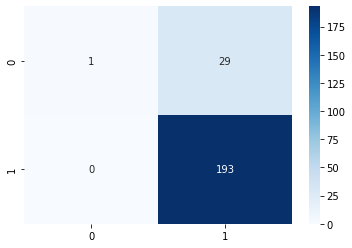

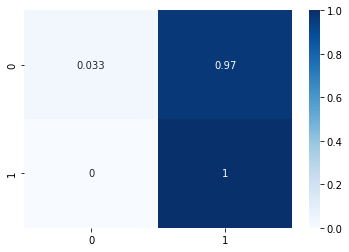

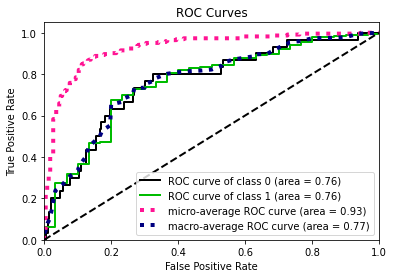

LOOCV score = 0.8654708520179372
Accuracy score: 0.8654708520179372


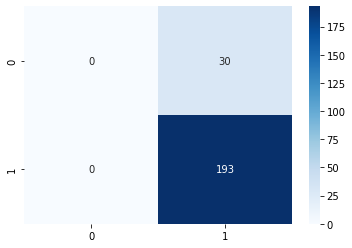

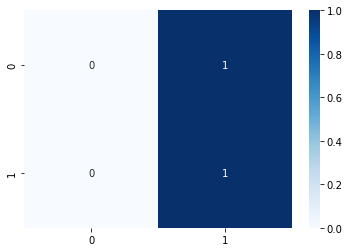

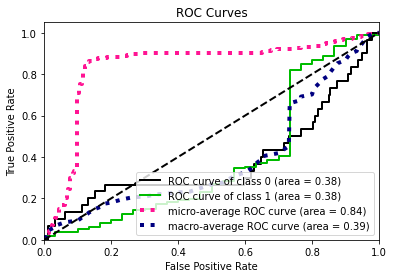

LOOCV score = 0.8654708520179372
Accuracy score: 0.8654708520179372


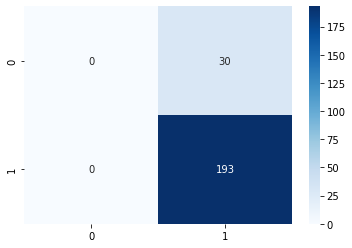

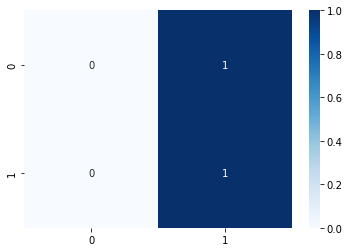

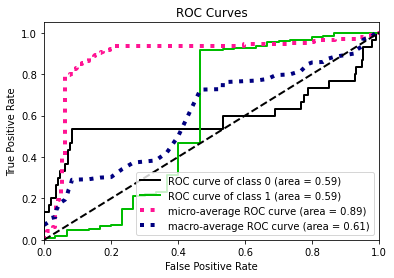

In [10]:
# train SVM on results (predicted), but without balancing the classes

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.780 (0.414)
Accuracy score: 0.7802690582959642


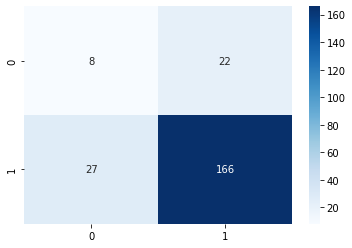

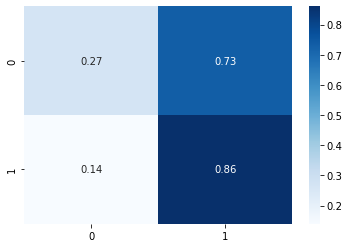

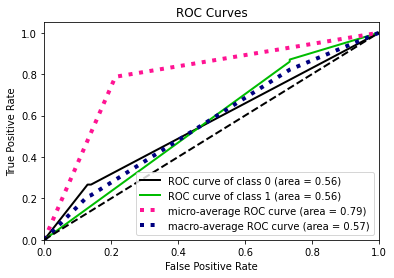

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 5856 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 9456 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 13856 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 19056 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1624 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 3536 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:   30.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 10048 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 16048 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 22848 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 30448 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:  2.7min finished


LOOCV score = 0.820627802690583
model : SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Accuracy score: 0.820627802690583


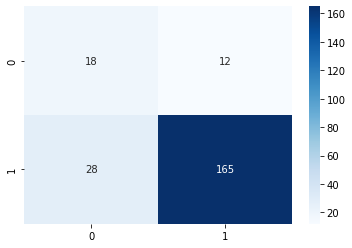

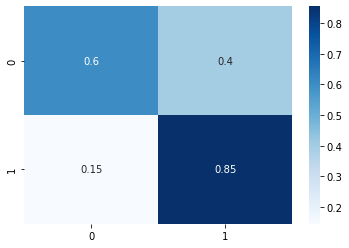

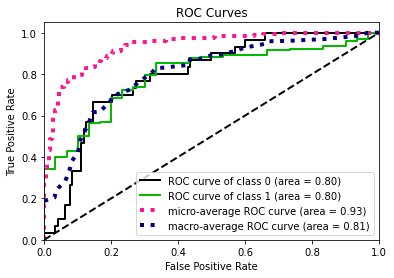

LOOCV score = 0.8475336322869955
model : SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Accuracy score: 0.8475336322869955


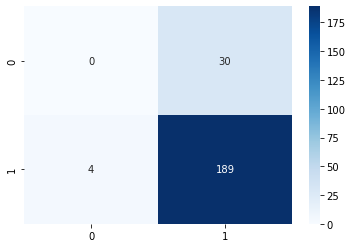

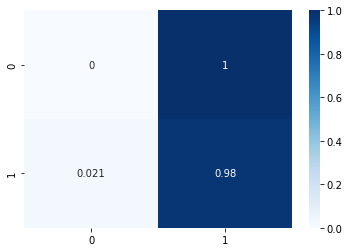

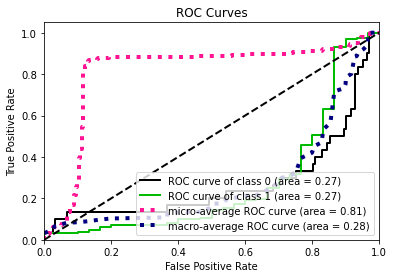

LOOCV score = 0.8385650224215246
model : SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-5.0, decision_function_shape='ovr', degree=3, gamma=0.1,
    kernel='sigmoid', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Accuracy score: 0.8385650224215246


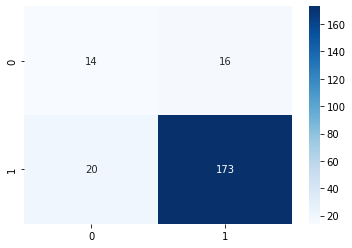

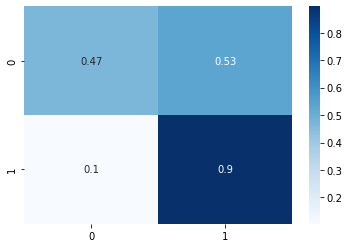

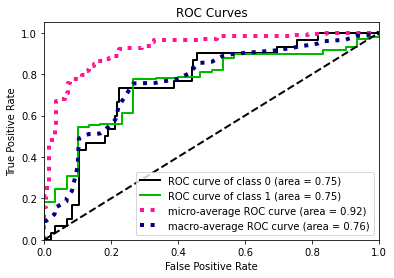

In [9]:
# Another grid search on results (predicted scores), but this time BALANCED
# The dataset is quite unbalanced

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  print('model : {}'.format(m_best))
  plot_model(m_best, X_s, y_3)

In [10]:
import joblib
joblib.dump(svm_poly.best_estimator_, '../new_models/svm_model_normal_to_pathology.joblib')
joblib.dump(scaler, '../new_models/svm_scaler_normal_to_pathology.joblib')

['../new_models/svm_scaler_normal_to_pathology.joblib']

In [ ]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [ ]:
df = pd.read_csv(os.path.join(root, 'bilanciato_miei_3.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

In [ ]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)